# Customer Churn Prediction Modeling
Goal: use machine learning to predict which customers will likely churn.
<br>Purpose: to reduce marketing expenditures and develop focused retention programs.
***

## Table of Contents 

1. [Introduction](#1.-Introduction)
2. [Dataset](#2.-Dataset)
<br>2.1 [Data Overview](#2.1-Data-Overview)
<br>2.2 [Feature Overview](#2.2-Feature-Overview)
3. [Data Cleaning](#3.-Data-Cleaning)
4. [Exploratory Data Analysis](#4.-Exploratory-Data-Analysis)
<br>4.1 [Distribution of Churn](#4.1-Distribution-of-Churn)
<br>4.2 [Distribution of Numerical Features](#4.2-Distribution-of-Numerical-Features)
<br>4.3 [Scatterplot of Churn & Contract by MonthlyCharges and tenure](#4.3-Scatterplot-of-Churn-&-Contract-by-MonthlyCharges-and-tenure)
<br>4.4 [Churn Rate by Catgorical Feature](#4.4-Churn-Rate-by-Categorical-Feature)
<br>4.5 [Notable Churn Rates](#4.5-Notable-Churn-Rates)
5. [Preprocessing](#5.-Preprocessing)
<br>5.1 [Creating Dummy Variables](#5.1-Creating-Dummy-Variables)
<br>5.2 [Heatmap of Correlation Coefficients](#5.2-Heatmap-of-Correlation-Coefficients)
6. [Model Building](#6.-Model-Building)
<br>6.1 [Intuition Behind Evaluation Metrics](#6.1-Intuition-Behind-Evaluation-Metrics)
<br>6.2 [XGBoost Model](#6.2-XGBoost-Model)
<br>6.3 [LightGBM Model](#6.3-LightGBM-Model)
<br>6.4 [CatBoost Model](#6.4-CatBoost-Model)
<br>6.5 [SVM Model](#6.5-SVM-Model)
7. [Model Results and Comparisions](#7.-Model-Results-and-Comparisons)
8. [Conclusion](#8.-Conclusion)

## 1. Introduction 

### 1.1 What is churn?

Customer churn refers to when a customer discontinues his or her commerce with a company. The churn rate measures the percentage of churned customers over a particular period - typically monthly, quarterly, or annually - depending on the company and industry. 

### 1.2 The Importance of Predicting Customer Churn

The ability to predict which customers are at high risk to churn presents a huge marketing opportunity to any company. [Marketers] can market towards these consumers with individualized offers based on their purchase history or profile to entice them to remain a customer. A retained customer is more likely to purchase new or existing products/services. 

### 1.3 Approach to Predicting Churn

1. Edit this 
2. churn prediction modeling - include the algorithms you're going to use to build the model here and include hyperlinks to them for easy navigation.

The churn detection task is an imbalanced classification problem: where we have two classes we need to identify - churn and no-churn - with one category representing the overwhelming majority of the data points. 

#### Problem

Acquiring a new customer can be five times more expensive than retaining an existing one. Such a staggering proportion emphasizes the importance of catering to an existing customer’s satisfaction and longevity to generate sales at a high ROI. In fact, increasing customer retention rates by as little as 5% can increase profits by 25 to 95%, according to a study done by Frederick Reichheld of Bain & Company. A key metric in evaluating customer retention is the customer churn rate.

In the telecommunications industry, the churn rate measures the percentage of service subscribers who discontinue their subscriptions over a particular period. Many providers in the industry offer similar services and generate the bulk of their revenue through subscription costs; therefore, the churn rate is a key metric to minimize to sustain subscription revenues.

The varying Internet, television, and telephone service providers available to the public make it easy and desirable for customers to try different services to see which works best for them. Some providers do not even require customers to lock into long-term contracts and give them the flexibility to change providers frequently. Service providers are able to provide more value to customers via short-term contracts by retaining their existing customers and minimizing their churn. 

# *edit the intro! ^

## 2. Dataset

### 2.1 Data Overview

The dataset used in this project is available on Kaggle, [here](https://www.kaggle.com/blastchar/telco-customer-churn).

Each row represents a customer and each column contains customers' attributes. The dataset includes information about demographics, services, account information, and churn. The "Churn" column is our binary target variable and represents customers who left within the last month.

### 2.2 Feature Overview
(code below left aligns the markdown tables)

In [1]:
%%html
<style>
    table {
        display: inline-block
    }
</style>

**A. Demographics**

| feature_name  | data_type   | description                    | unique_values      |
| ------------- | ----------- | ------------------------------ | ------------------ |
| gender        | categorical | sex                            | "Male" , "Female"  |
| SeniorCitizen | categorical | is senior citizen              | "Yes", "No"        |
| Partner       | categorical | customer has a partner         | "Yes", "No"        |
| Dependents    | categorical | customer has dependents        | "Yes", "No"        |

**B. Services**

| feature_name      | data_type   | description                    | unique_values              |
| ----------------- | ----------- | ------------------------------ | -------------------------- |
| PhoneService      | categorical | has phone service              | "Yes", "No"                |
| MultipleLines     | categorical | has multiple phone lines       | "Yes", "No"                |
| InternetService   | categorical | type of Internet service       | "DSL", "Fiber optic", "No" |
| OnlineSecurity    | categorical | has malware protection         | "Yes", "No"                |
| OnlineBackup      | categorical | has digital backup service     | "Yes", "No"                |
| DeviceProtection  | categorical | has device protection plan     | "Yes", "No"                |
| TechSupport       | categorical | has tech support               | "Yes", "No"                |
| StreamingTV       | categorical | has TV streaming service       | "Yes", "No"                |
| StreamingMovies   | categorical | has movie streaming service    | "Yes", "No"                |

**C. Account Information**

| feature_name      | data_type           | description                            | unique_values                   |
| ----------------- | ------------------- | -------------------------------------- | ------------------------------- |
| customerID        | categorical         | customer identification number         |                                 |
| tenure            | numerical (ordinal) | # of months with company               |                                 |
| Contract          | categorical         | contractual term                       | "Monthly", "Annual", "Biannual" |
| PaperlessBilling  | categorical         | billed via email                       | "Yes", "No"                     |
| PaymentMethod     | categorical         | method of payment on file              | "Electronic Check", "Mailed Check", "Bank transfer (automatic)", "Credit card (automatic)"    |
| MonthlyCharges    | numerical (cardinal)| amount charged to the customer monthly |                         |
| TotalCharges      | numerical (cardinal)| total amount charged to the customer   |                         |

**D. Target Variable**

| feature_name      | data_type         | description                    | unique_values                   |
| ----------------- | ----------------- | ------------------------------ | ------------------------------- |
| Churn             | categorical       | left within the last month     | "Yes", "No"                     |

***

## 3. Data Cleaning

In [2]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

#Load dataset
df = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv', index_col='customerID')

# Identify feature data types and data set shape. 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), object(17)
memory usage: 1.1+ MB


The output above shows no missing values in the dataset; however, there may be missing values encoded with erroneous symbols. We'll take a closer look at potential missing values in a bit but first, we can see that the **TotalCharges** Series is categorically encoded as an "object" when it should be numerically encoded as "float64" data type. Let's take a closer look at the values in the column.

In [3]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

We can see that the numbers in the TotalCharges column are encoded as strings. Since the Series contains string values, it may contain null values that are encoded as strings, such as blank spaces or dashes. **After checking for these null values** and imputing or dropping them, we'll convert the Series to float64 data type.

In [4]:
# Identify number of missing (null) values in the data set.
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

At first glance, all features appear to have non-null entries; however, there may still be missing values encoded in different ways. Let's check if any entries in the dataframe contain blank spaces or random symbols that could be used to represent a missing entry.

In [5]:
# Replace any whitespace values with NaN
df = df.replace(r'\s+$', np.nan, regex=True)

# Replace any wild characters (symbols) with NaN
wild_chars = ['?', '-', '.', '_', '*']
for i in wild_chars:
    df[df == i] = np.nan

# Print number of null values 
print(df.isnull().sum())

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


The TotalCharges column contains 11 missing/null values. The records containing null values comprise only 0.16% of the total samples. Since these problematic records account for a small proportion of the total samples, dropping them won't have a significant impact on our analysis. Let's go ahead and drop all records containing null values.

In [6]:
# Drop missing values
df = df.dropna()

# After dropping the missing values from the TotalCharges column, convert it from string to float. 
df.TotalCharges = df.TotalCharges.astype(float)

The missing values have been dropped from the dataset and the TotalCharges column is converted into a numerical feature. Let's display the unique values for each column to see if we can further consilidate the features and/or values.

In [7]:
# Display unique values for each feature.
for col in df:
    print(col)
    print(df[col].unique(), '\n')

gender
['Female' 'Male'] 

SeniorCitizen
[0 1] 

Partner
['Yes' 'No'] 

Dependents
['No' 'Yes'] 

tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39] 

PhoneService
['No' 'Yes'] 

MultipleLines
['No phone service' 'No' 'Yes'] 

InternetService
['DSL' 'Fiber optic' 'No'] 

OnlineSecurity
['No' 'Yes' 'No internet service'] 

OnlineBackup
['Yes' 'No' 'No internet service'] 

DeviceProtection
['No' 'Yes' 'No internet service'] 

TechSupport
['No' 'Yes' 'No internet service'] 

StreamingTV
['No' 'Yes' 'No internet service'] 

StreamingMovies
['No' 'Yes' 'No internet service'] 

Contract
['Month-to-month' 'One year' 'Two year'] 

PaperlessBilling
['Yes' 'No'] 

PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 

MonthlyCharges
[29.85 56.95 53.85 ... 63.1  44.2  78.7

* Let's replace the 0's and 1's in the SeniorCitizen column with "No" and "Yes", respectively, to keep the binary feature values consistent for one-hot encoding and visualization labeling. We will encode all features numerically for model building during [preprocessing](#5.1-Creating-Dummy-Variables). 
* For the features relating to Services, we replace the "No internet service" value to "No" to eliminate redundancy: the InternetService feature let's us know whether or not the customer had Internet services. 
* We must also replace the "No phone service" value in the MultipleLines feature with "No" to eliminate redunancy: the PhoneService feature let's us know whether or not the customer had phone services.
* For the Contract feature, let's replace the following for simplicity:
    * "Month-to-month" with "Monthly"
    * "One year" with "Annual"
    * "Two year" with "Biannual"

In [8]:
# Replace 0 and 1 with "No" and "Yes" in SeniorCitizen feature
df.SeniorCitizen = df.SeniorCitizen.replace({1:'Yes', 0:'No'})

# Replace "No internet service" with "No"
internet_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for x in internet_cols:
    df[x] = df[x].replace({'No internet service' : 'No'})

# Replace "No phone service" with "No"
df.MultipleLines = df.MultipleLines.replace({'No phone service' : 'No'})

# Contract feature changes
df.Contract = df.Contract.replace({
    'Month-to-month' : 'Monthly',
    'One year' : "Annual",
    'Two year' : 'Biannual'
})

The feature value consolidations are complete. Let's view all the updates made to our dataset on the first 5 records.

In [9]:
# View all changes made up to this point on the first 5 records
df.head()

gender SeniorCitizen Partner Dependents  tenure PhoneService  \
customerID                                                                 
7590-VHVEG  Female            No     Yes         No       1           No   
5575-GNVDE    Male            No      No         No      34          Yes   
3668-QPYBK    Male            No      No         No       2          Yes   
7795-CFOCW    Male            No      No         No      45           No   
9237-HQITU  Female            No      No         No       2          Yes   

           MultipleLines InternetService OnlineSecurity OnlineBackup  \
customerID                                                             
7590-VHVEG            No             DSL             No          Yes   
5575-GNVDE            No             DSL            Yes           No   
3668-QPYBK            No             DSL            Yes          Yes   
7795-CFOCW            No             DSL            Yes           No   
9237-HQITU            No     Fiber optic             No           No   

           DeviceProtection TechSupport StreamingTV StreamingMovies Contract  \
customerID                                                                     
7590-VHVEG               No          No          No              No  Monthly   
5575-GNVDE              Yes          No          No              No   Annual   
3668-QPYBK               No          No          No              No  Monthly   
7795-CFOCW              Yes         Yes          No              No   Annual   
9237-HQITU               No          No          No              No  Monthly   

           PaperlessBilling              PaymentMethod  MonthlyCharges  \
customerID                                                               
7590-VHVEG              Yes           Electronic check           29.85   
5575-GNVDE               No               Mailed check           56.95   
3668-QPYBK              Yes               Mailed check           53.85   
7795-CFOCW               No  Bank transfer (automatic)           42.30   
9237-HQITU              Yes           Electronic check           70.70   

            TotalCharges Churn  
customerID                      
7590-VHVEG         29.85    No  
5575-GNVDE       1889.50    No  
3668-QPYBK        108.15   Yes  
7795-CFOCW       1840.75    No  
9237-HQITU        151.65   Yes

Let's export the cleaned data to a CSV file so we can load it in external notebooks for additional exploratory data analysis and model tuning.

In [10]:
# Export cleaned, original dataframe to csv file
df.to_csv('data/cleaned_data/og_cleaned_samples.csv')

The data is cleaned and ready for some [EDA](#4.-Exploratory-Data-Analysis) and [model buidling](#6.-Model-Building)!

***

## 4. Exploratory Data Analysis
### 4.1 Distribution of Churn 

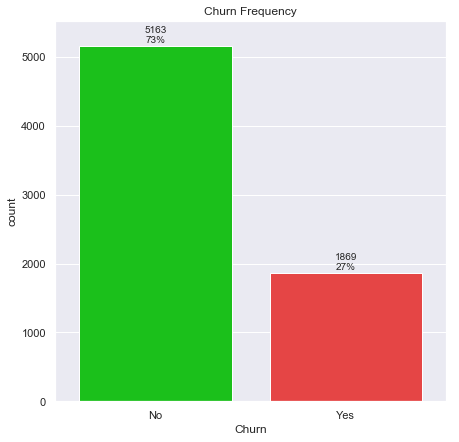

In [11]:
# Define colors
lightgreen = '#00db00'
red = '#ff2b2b'

# Instantiate figure to render plot on
plt.figure(figsize=(7, 7));

# Draw countplot of Churn frequency
ax_vc = sns.countplot(x='Churn', palette=[lightgreen, red], data=df);

# Display percentages above each bar so that the sum per value equals 100%
bars = ax_vc.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]
for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r
    ax_vc.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0f}\n{1:.0%}'.format(height_l, height_l/total), ha="center")
    ax_vc.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0f}\n{1:.0%}'.format(height_r, height_r/total), ha="center")
plt.margins(0.07)
# Display title
plt.title('Churn Frequency');

plt.show()

* The churn rate (target variable) in our samples is **imbalanced**. 
* During model building, we will rescale the weights of the classes and tune parameters that accomodate for the class imbalance to optimize performance.
* We will evaluate model performance using [metrics](#6.1-Intuition-Behind-Evaluation-Metrics) that are less sensitive to class imbalance.

Click [here](#6.-Model-Building) to skip EDA and jump straight to the model building!

### 4.2 Distribution of Numerical Features

In [12]:
# Summary statistics of numerical features
df.describe()

tenure  MonthlyCharges  TotalCharges
count  7032.000000     7032.000000   7032.000000
mean     32.421786       64.798208   2283.300441
std      24.545260       30.085974   2266.771362
min       1.000000       18.250000     18.800000
25%       9.000000       35.587500    401.450000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.862500   3794.737500
max      72.000000      118.750000   8684.800000

The table above shows summary statistics for the numerical features in our dataset.

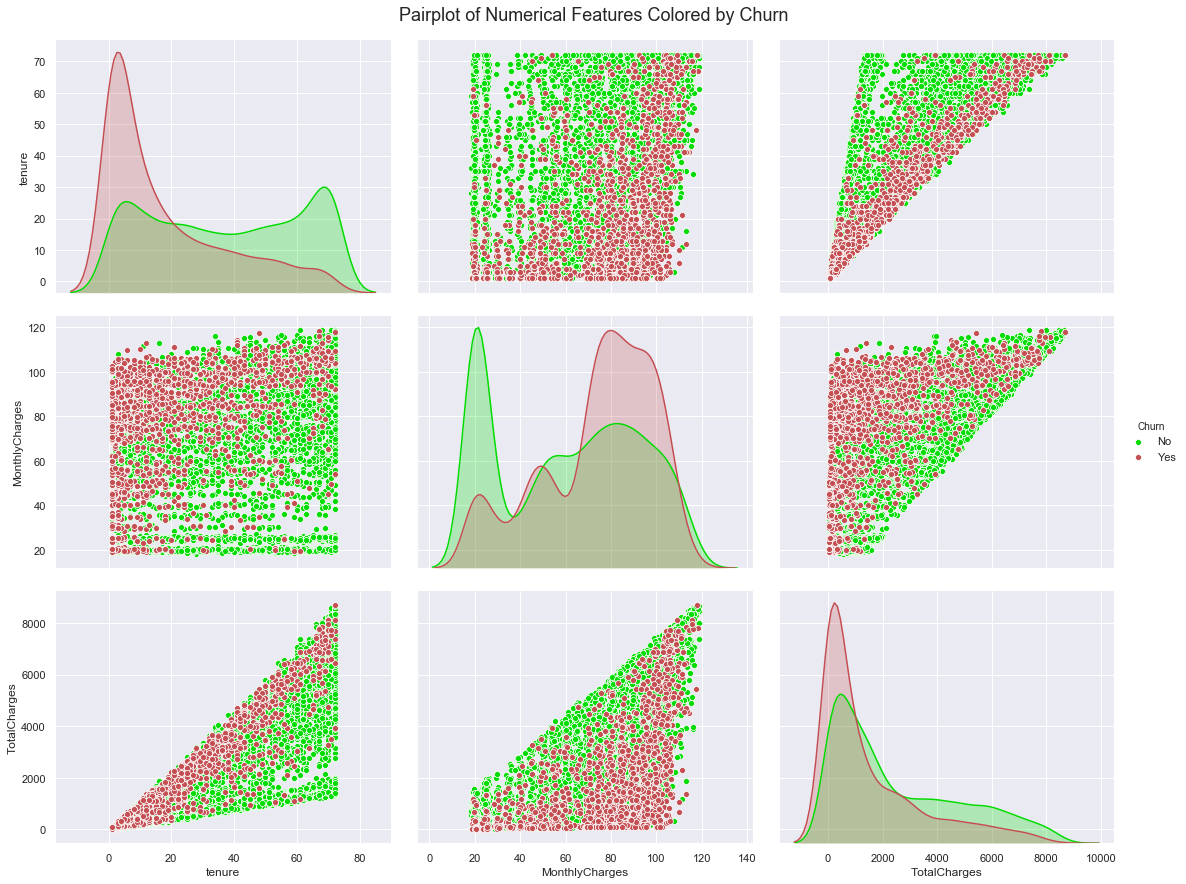

In [13]:
# Plot pairwise relationships between numerical features colored by Churn
g = sns.pairplot(df, hue='Churn', palette=[lightgreen, 'r'], height=4, aspect=1.3);

# Display parent title for figures
g.fig.suptitle('Pairplot of Numerical Features Colored by Churn', y=1.02, fontsize=18);

# Display plot
plt.show()

The diagonal univariate plots show kernel density estimates for our numerical data and summarize their distribution - which tell us customers with low tenure, high monthly charges, and/or high total charges churned the most.

The scatterplots convey the relationship between numerical features, most notably showing a positive, linear relationship between the following pairs of variables:
* TotalCharges and tenure
* TotalCharges and MonthlyCharges

A customer's total charges will compound overtime as he/she continues paying for services - in other words, the longer you're a customer, the more expenses you will incur. A customer's total charges are therefore **dependent** on tenure with the company. 

Similarly, a customer's total charges will increase with their monthly charges. The rate at which a customer's total charges increases is **dependent** on the monthly rate, as it is the product of monthly charges and tenure. The rate at which a customer's total charges compound can change depending on monthly rates but will inherently increase overtime. A customer's total charges are therefore **dependent** on his/her monthly charges.

In the subsequent sections, we'll explore our only pair of **independent** numerical variables, MonthlyCharges and tenure, against a few categorical variables.
***

### 4.3 Scatterplot of Churn & Contract by MonthlyCharges and tenure

As a quick recap, we only have 3 numeric features in the dataset: TotalCharges, MonthlyCharges, and tenure. 

A customer's total charges are **dependent** on monthly charges and tenure. As monthly charges increase, so will the total charges; similarly, as the customer's tenure with the company increases, so does the total charges incurred over the given period.

A customer's monthly charges, however, is **independent** of tenure since it doesn't effect the growth or change of the other. In the telecom industry, the churn rate is typically measured monthly since providers price their services on a monthly basis and experience faster churn rates. Monthly charges are therefore an essential feature to analyze when evaluating churn. Let's analyze clusters of churn between MonthlyCharges and tenure to uncover some hidden insights in our data.

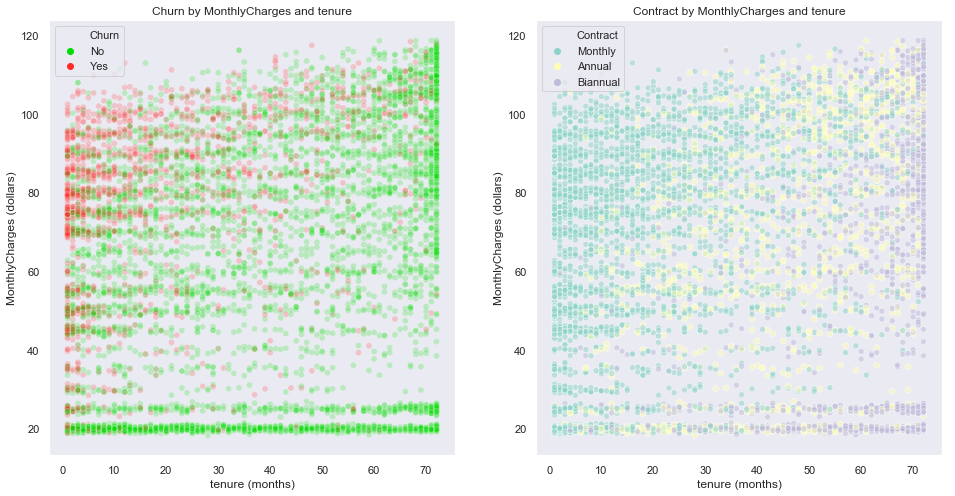

In [14]:
# Draw figure 
plt.figure(figsize=(16, 8));

# Scatterplot of Churn by MonthlyCharges and tenure 
plt.subplot(121);
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', palette=[lightgreen, red], alpha=0.20, data=df);
plt.xlabel('tenure (months)');
plt.ylabel('MonthlyCharges (dollars)');
plt.title('Churn by MonthlyCharges and tenure');
plt.grid(False)

# Scatterplot of Contract by MonthlyCharges and tenure
plt.subplot(122);
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Contract', palette='Set3', alpha=0.50, data=df);
plt.xlabel('tenure (months)');
plt.ylabel('MonthlyCharges (dollars)');
plt.title('Contract by MonthlyCharges and tenure');
plt.grid(False)

# Display plot
plt.show()

The scatterplot to the left visualizes **churn** by monthly charges and tenure with transparency to accentuate clusters of records. The scatterplot to the right visualizes **contract types** by monthly charges and tenure. Churn and Contract are represented on two different plots to clearly identify clusters and trends for each variable.

The scatterplots above convey the following information:
* **Cluster 1:** Customers that pay less than 35/mo tend to not churn for up to 70 months and sign longer contracts as their tenure increases.
* **Cluster 2:** Customers that pay more than 70/mo with less than 10 months of tenure have monthly contracts and tend to churn.
* **Cluster 3:** Customers with more than 60 months of tenure tend to not churn and sign biannual contracts that incur the highest monthly charges.

<div class="alert alert-block alert-info">
View an in-depth analysis of the three clusters in this <a href="https://github.com/ayn28/churn-prediction-modeling/blob/master/model-tuning/XGBoost-tuning.ipynb">notebook</a>. The main focus of this notebook is the model evaluation.
    
</div>

### 4.4 Churn Rate by Categorical Feature

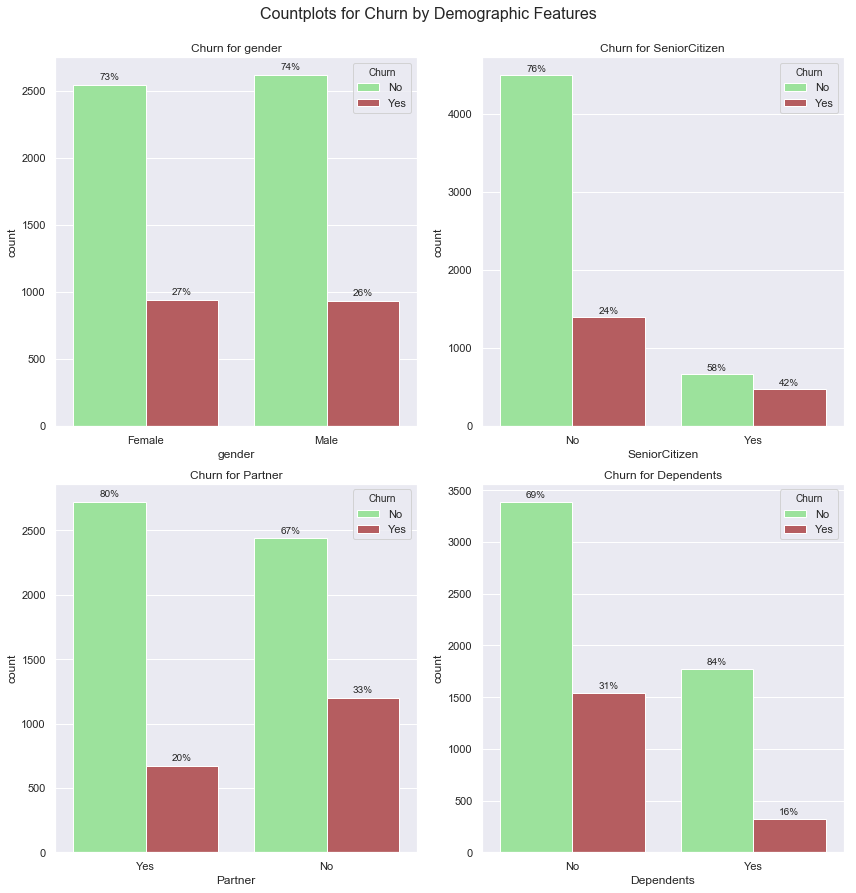

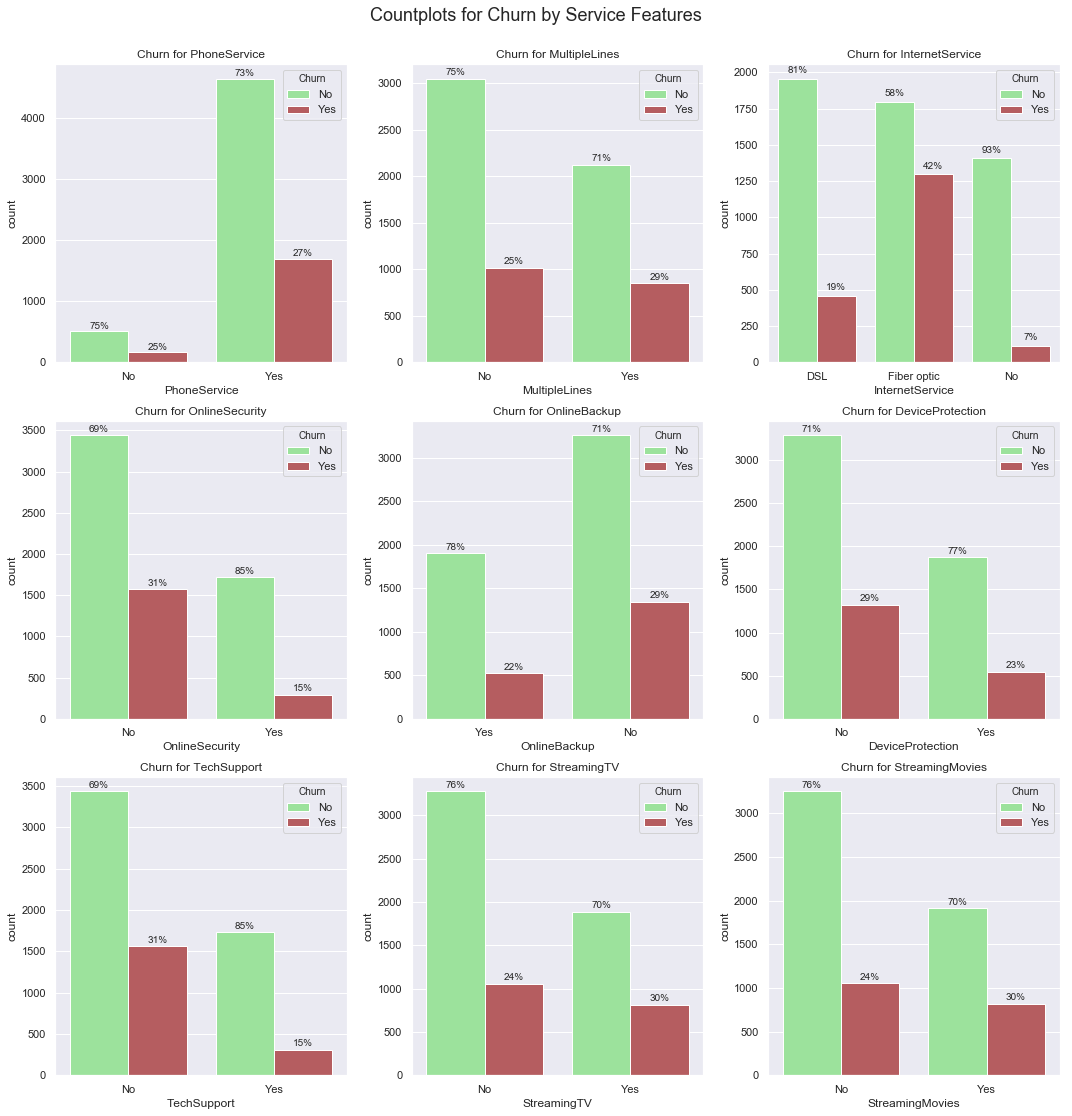

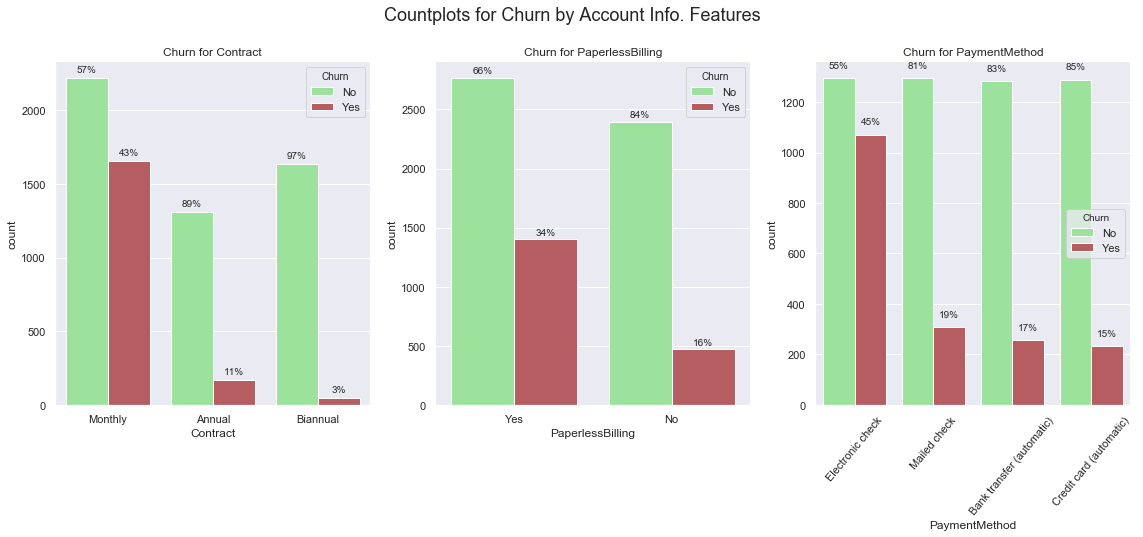

In [15]:
# Categorical demographic features
demo_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

# Instantiate figure to render plots on
fig8 = plt.figure(figsize=(12, 12))

# Figure title
fig8.suptitle('Countplots for Churn by Demographic Features', y=1.03, fontsize=16);
    
# Loop through demographic features and draw plots
for col, i in zip(demo_cols, range(1, len(demo_cols) + 1)):
    plt.subplot(2, 2, i);
    ax = sns.countplot(x=col, hue='Churn', palette=['lightgreen', 'r'], data=df);

    # Display percentages above each bar so that the sum per value equals 100%
    bars = ax.patches
    half = int(len(bars)/2)
    left_bars = bars[:half]
    right_bars = bars[half:]

    for left, right in zip(left_bars, right_bars):
        height_l = left.get_height()
        height_r = right.get_height()
        total = height_l + height_r

        ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
        ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

    # Set title
    plt.title('Churn for ' + col);
    
# Display plot
plt.tight_layout()
plt.show()

# Categorical service features 
serv_cols = [
    'PhoneService',
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies'
]

# Instantiate figure to render plots on
fig9 = plt.figure(figsize=(15, 15))

# Figure title
fig9.suptitle('Countplots for Churn by Service Features', y=1.03, fontsize=18);
    
# Loop through service features and draw plots
for col, i in zip(serv_cols, range(1, len(serv_cols) + 1)):
    plt.subplot(3, 3, i);
    ax = sns.countplot(x=col, hue='Churn', palette=['lightgreen', 'r'], data=df);
    
    # Display percentages above each bar so that the sum per value equals 100%
    bars = ax.patches
    half = int(len(bars)/2)
    left_bars = bars[:half]
    right_bars = bars[half:]

    for left, right in zip(left_bars, right_bars):
        height_l = left.get_height()
        height_r = right.get_height()
        total = height_l + height_r

        ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
        ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")
    
    # Set title
    plt.title('Churn for ' + col);
    
# Display plot
plt.tight_layout()
plt.show()

# Categorical account info features
acct_cols = [
    'Contract',
    'PaperlessBilling',
    'PaymentMethod'
]

# Instantiate figure to render plots on
fig10 = plt.figure(figsize=(16, 7))

# Figure title
fig10.suptitle('Countplots for Churn by Account Info. Features', y=1.06, fontsize=18);
    
# Loop through account info features and draw plots
for col, i in zip(acct_cols, range(1, len(acct_cols) + 1)):
    plt.subplot(1, 3, i);
    ax = sns.countplot(x=col, hue='Churn', palette=['lightgreen', 'r'], data=df);
    
    # Display percentages above each bar so that the sum per value equals 100%
    bars = ax.patches
    half = int(len(bars)/2)
    left_bars = bars[:half]
    right_bars = bars[half:]

    for left, right in zip(left_bars, right_bars):
        height_l = left.get_height()
        height_r = right.get_height()
        total = height_l + height_r

        ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
        ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")
    
    if col == 'PaymentMethod':
        plt.xticks(rotation=50);
        plt.legend(['No', 'Yes'], loc='center right', title='Churn');
        
    # Set title
    plt.title('Churn for ' + col);
    
# Display plot
plt.tight_layout()
plt.show()

### 4.5 Notable Churn Rates
(for categorical features)

1. **SeniorCitizen**: majority of customers in our samples are not senior citizens who did not churn.
2. **Dependents**: the churn rate for those with dependents is the lowest out of all demographic features.
3. **PhoneService**: almost all customers pay for phone services.
4. **InternetService**: those without internet service had the lowest churn rate whereas those with fiber optic had the highest churn rate.
5. **OnlineSecurity**: the churn rate for those without online security was double the rate of those with online security.
6. **TechSupport**: the churn rate for those without tech support was double the rate of those with tech support.
7. **Contract**: customers with monthly contracts churned significantly more than those with annual and biannual contracts.
8. **PaperlessBilling**: the churn rate for those with paperless billing was double the rate of those without paperless billing.
9. **PaymentMethod**: customers who paid via electronic check had the highest churn rate out of all account information features.

## 5. Preprocessing
### 5.1 Creating Dummy Variables
Since scikit-learn does not accept categorical features to model with, we must encode the categorical features numerically. 

In [16]:
# Create dummy variables
df_cat_encoded = pd.get_dummies(df, drop_first=True)
df_cat_encoded.head()

tenure  MonthlyCharges  TotalCharges  gender_Male  \
customerID                                                      
7590-VHVEG       1           29.85         29.85            0   
5575-GNVDE      34           56.95       1889.50            1   
3668-QPYBK       2           53.85        108.15            1   
7795-CFOCW      45           42.30       1840.75            1   
9237-HQITU       2           70.70        151.65            0   

            SeniorCitizen_Yes  Partner_Yes  Dependents_Yes  PhoneService_Yes  \
customerID                                                                     
7590-VHVEG                  0            1               0                 0   
5575-GNVDE                  0            0               0                 1   
3668-QPYBK                  0            0               0                 1   
7795-CFOCW                  0            0               0                 0   
9237-HQITU                  0            0               0                 1   

            MultipleLines_Yes  InternetService_Fiber optic    ...      \
customerID                                                    ...       
7590-VHVEG                  0                            0    ...       
5575-GNVDE                  0                            0    ...       
3668-QPYBK                  0                            0    ...       
7795-CFOCW                  0                            0    ...       
9237-HQITU                  0                            1    ...       

            TechSupport_Yes  StreamingTV_Yes  StreamingMovies_Yes  \
customerID                                                          
7590-VHVEG                0                0                    0   
5575-GNVDE                0                0                    0   
3668-QPYBK                0                0                    0   
7795-CFOCW                1                0                    0   
9237-HQITU                0                0                    0   

            Contract_Biannual  Contract_Monthly  PaperlessBilling_Yes  \
customerID                                                              
7590-VHVEG                  0                 1                     1   
5575-GNVDE                  0                 0                     0   
3668-QPYBK                  0                 1                     1   
7795-CFOCW                  0                 0                     0   
9237-HQITU                  0                 1                     1   

            PaymentMethod_Credit card (automatic)  \
customerID                                          
7590-VHVEG                                      0   
5575-GNVDE                                      0   
3668-QPYBK                                      0   
7795-CFOCW                                      0   
9237-HQITU                                      0   

            PaymentMethod_Electronic check  PaymentMethod_Mailed check  \
customerID                                                               
7590-VHVEG                               1                           0   
5575-GNVDE                               0                           1   
3668-QPYBK                               0                           1   
7795-CFOCW                               0                           0   
9237-HQITU                               1                           0   

            Churn_Yes  
customerID             
7590-VHVEG          0  
5575-GNVDE          0  
3668-QPYBK          1  
7795-CFOCW          0  
9237-HQITU          1  

[5 rows x 24 columns]

The table above shows the first 5 records of our numerically encoded dataset.

### 5.2 Heatmap of Correlation Coefficients

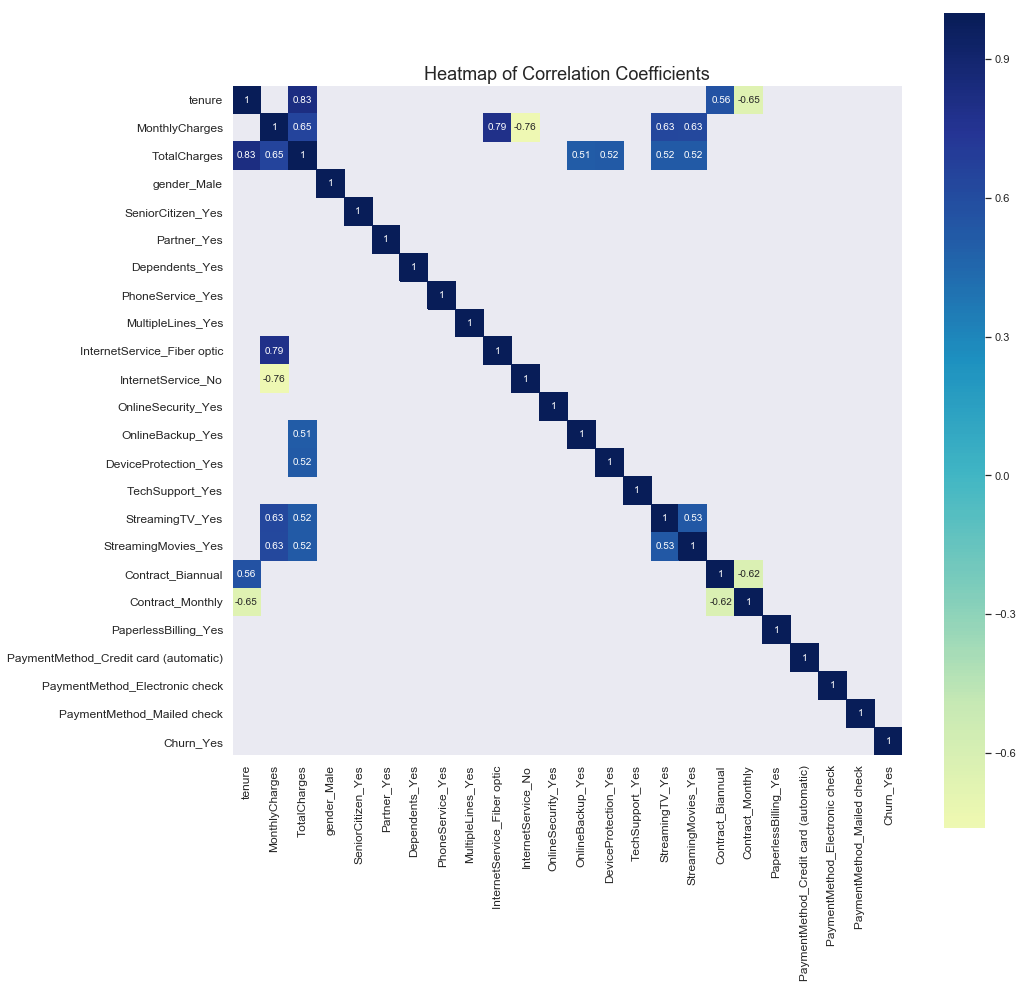

In [17]:
# Instantiate a mask for the weak correlations
weak_corr = ((0.5 > df_cat_encoded.corr()) & (df_cat_encoded.corr() > -0.50))

# Instantiate figure to render subsequent plot on
plt.figure(figsize=(15, 15))

# Draw masked heatmap
sns.heatmap(df_cat_encoded.corr(), 
            xticklabels=df_cat_encoded.corr().columns, 
            yticklabels=df_cat_encoded.corr().columns,
            center=0,
            cmap="YlGnBu",
            square=True,
            annot=True,
            mask=weak_corr,
            cbar=True)

# Set x and y tick (feature name) font sizes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Heatmap of Correlation Coefficients', fontsize=18)

# Display plot
plt.show()

* The heatmap above computes the pairwise correlation between each feature in the dataset.
* Given the correlation coefficients range from -1 to 1, a coefficient with an absolute value greater than 0.5 is considered a strong positive/negative correlation.
* There are no input variables in the dataset that are strongly correlated with the target variable, Churn_Yes.
* TotalCharges and tenure are over 80% correlated with each other since TotalCharges is a dependent variable - a product of tenure and MonthlyCharges. Including this feature pair in some machine learning algorithms can create significant problems, while in others it will only introduce some minor redundancy and bias.
* We'll use all the features in our gradient boosting algorithms since their complexity can better accomodate for feature discrepencies.
* We'll exclude TotalCharges from the SVM model to reduce its dimensionality and optimize its speed and loss function.

Let's export the numerically encoded dataframe to a CSV file to load it into separate notebooks for extensive model tuning. Links to the external tuning notebooks are provided in the beginning of the model building section and at the beginning of each model's section.

In [18]:
# Export cleaned, numerically encoded dataframe to csv file
df_cat_encoded.to_csv('data/cleaned_data/num_cleaned_samples.csv')

## 6. Model Building
1. Describe the intuition behind choosing evaluation metrics.
2. Build the following models: XGBoost, LightGBM, CatBoost, and SVM
3. Compare model evaluation metrics.
4. Choose the best model.

<div class="alert alert-block alert-info">
The models shown in this notebook were tuned in separate notebooks. <br>Click the links below to view each model's tuning process.
<li><a href="https://github.com/ayn28/churn-prediction-modeling/blob/master/model-tuning/XGBoost-tuning.ipynb">XGBoost</a></li>
<li><a href="https://github.com/ayn28/churn-prediction-modeling/blob/master/model-tuning/LightGBM-tuning.ipynb">LightGBM</a></li>
<li><a href="https://github.com/ayn28/churn-prediction-modeling/blob/master/model-tuning/CatBoost-tuning.ipynb">CatBoost</a></li>
<li><a href="https://github.com/ayn28/churn-prediction-modeling/blob/master/model-tuning/SVM-tuning.ipynb">SVM</a></li>
</div>

### 6.1 Intuition Behind Evaluation Metrics

#### Class Imbalance

Given our imbalanced classification problem where the negative class outnumbers the positive class, we must evaluate our models' performance with metrics that don't require the negative class for calculation. By excluding the larger, disproportionate negative class from our evaluation metrics, we'll focus on the models' ability to identify the positive class, accomodate for the class imbalance, and reduce biased classifications to the negative class.

#### Precision, Recall, and F1

We'll also evaluate precision, recall, and f1 since they focus on identifying the positive "churn" records. Precision measures the percent of predicted “churners” that actually churned whereas recall measures the total percentage of correctly predicted “churners”. The f1-score is the harmonic mean of precision and recall that takes both metrics into account. 

#### AUCROC and AUCPR

We'll evaluate the AUCROC score, which is the area under the receiver operating characteristic curve, and the AUCPR score, which is the area under the precision-recall curve. Both of these values measure the models' ability to identify the positive "churn" records - the closer the value is to one, the better the model is at predicting churners.

#### Logloss

Logarithmic loss, or logloss, is a measure for prediction uncertainty that we want to minimize. It captures the difference in the predicted and actual probability distributions and is not distorted by the class imbalance. We'll use logloss as the loss function for the gradient boosting algorithms and evaluate each model's logloss value to get a more well-rounded representation of each model's performance.

### 6.2 XGBoost Model
Click [here](https://github.com/ayn28/churn-prediction-modeling/blob/master/model-tuning/XGBoost-tuning.ipynb) to view the tuning process.

In [130]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import auc, roc_curve, precision_recall_curve, average_precision_score

# Define function to calculate evaluation metrics.
def xgb_metrics(clf_name, results_dict, ordered_dict):
    """Calculate and output evaluation metrics."""
    # Print best iteration
    print('Best iteration: {} rounds.'.format((clf_name.best_iteration)))
    # Store the AUCPR and AUC at the model's 
    # best iteration, using the AUC as the early
    # stopping metric.
    eval_mtrs = [{'logloss': i['logloss'][clf_name.best_iteration], 'aucpr': i['aucpr'][clf_name.best_iteration], 'auc': i['auc'][clf_name.best_iteration]} for i in results_dict.values()]
    logloss_mtr = eval_mtrs[0]['logloss']
    aucpr_mtr = eval_mtrs[0]['aucpr']
    auc_mtr = eval_mtrs[0]['auc']
    print('AUCROC:    {:.3f}'.format(auc_mtr))
    print('AUCPR:     {:.3f}'.format(aucpr_mtr))
    print('Logloss:   {:.3f}'.format(logloss_mtr))
    # Calculate precision, recall, and f1
    binary_preds = clf_name.predict(X_test)
    precision_mtr = precision_score(y_test, binary_preds)
    recall_mtr = recall_score(y_test, binary_preds)
    f1_mtr = f1_score(y_test, binary_preds)
    print('Precision: {0:.3f}'.format(precision_mtr))
    print('Recall:    {0:.3f}'.format(recall_mtr))
    print('F1-score:  {0:.3f}'.format(f1_mtr))
    # Append metrics to an ordered dictionary (for plotting)
    ordered_dict['AUCROC'] = round(auc_mtr, 3)
    ordered_dict['AUCPR'] = round(aucpr_mtr, 3)
    ordered_dict['Logloss'] = round(logloss_mtr, 3)
    ordered_dict['Precision'] = round(precision_mtr, 3)
    ordered_dict['Recall'] = round(recall_mtr, 3)
    ordered_dict['F1_score'] = round(f1_mtr, 3)
    
# Define function to plot ROC and PR curve.
def plot_roc_pr(clf_name):
    """Plot the ROC and PR-curve for a given classifier."""
    plt.figure(figsize=(14, 7))
    # Plot ROC
    plt.subplot(121)
    probs = clf_name.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label='AUC = %0.3f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    # Plot PR curve
    plt.subplot(122)
    precision, recall, thresholds = precision_recall_curve(y_test, probs)
    average_precision = average_precision_score(y_test, probs)
    plt.title('Precision-Recall Curve')
    plt.plot(recall, precision, 'b', label='AUCPR = %0.3f' % average_precision)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0.5, 0.5], 'r--')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.show()

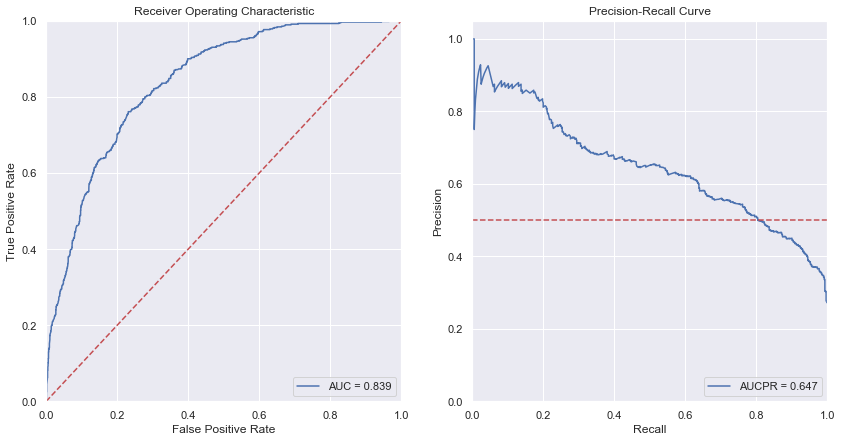

Best iteration: 16 rounds.
AUCROC:    0.839
AUCPR:     0.647
Logloss:   0.496
Precision: 0.498
Recall:    0.813
F1-score:  0.617


In [136]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from collections import OrderedDict

# Create features and target arrays
X = df_cat_encoded.drop(['Churn_Yes', 'gender_Male'], axis=1).values
y = df_cat_encoded.Churn_Yes.values

# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Final parameters
params_xgb = {
    'max_depth':        3,
    'min_child_weight': 13,
    'gamma':            5,
    'subsample':        1,        
    'colsample_bytree': 1,        
    'learning_rate':    0.3,      
    'n_estimators':     500,
    'scale_pos_weight': 2.76,        
    'verbosity':        0,
    'objective':        'binary:logistic',
    'eval_metric':      ['logloss', 'aucpr', 'auc'],     
    'seed':             42
}

# Instantiate classifier
clf_xgb = XGBClassifier(**params_xgb)

# Fit classifier
clf_xgb.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)],
    eval_metric=['logloss', 'aucpr', 'auc'],          
    early_stopping_rounds=10,
    verbose=False
)

# Store evaluation metrics in a dictionary
xgb_results = clf_xgb.evals_result()

# Output and plot evaluation metrics
xgb_evals_dict = OrderedDict()
plot_roc_pr(clf_xgb)
xgb_metrics(clf_xgb, xgb_results, xgb_evals_dict)

In [162]:
# Costs associated with each correct/incorrect classification
costs = {'fn': 500, 'tn': 0, 'fp': 100, 'tp': 100}

# Cost function we want to minimize
def cost_function(costs, tn, fp, fn, tp):
    return ((costs['fn']*fn)+(costs['tn']*tn)+(costs['fp']*fp)+(costs['tp']*tp))/(fn+tn+fp+tp)

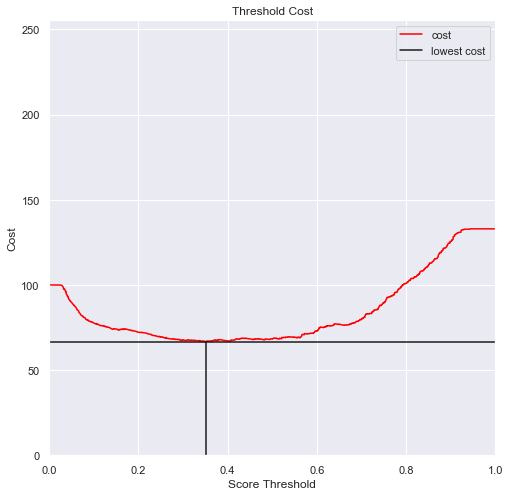

Best threshold: 0.35
Lowest cost:  $66.45


In [163]:
thresh_vals = np.arange(0, 1.0005, 0.0005)
thresh_dict = {}
for t in thresh_vals:
    preds = (clf_xgb.predict_proba(X_test)[:, 1] > t).astype('int')
    TN, FP, FN, TP = confusion_matrix(y_test, preds).ravel()
    thresh_dict[t] = cost_function(costs, TN, FP, FN, TP)

best_threshold = min(thresh_dict.items(), key=lambda x: x[1])[0]
lowest_cost = min(thresh_dict.items(), key=lambda x: x[1])[1]
highest_cost = max(thresh_dict.items(), key=lambda x: x[1])[1]
thresholds = [t for t in thresh_dict.keys()]
costs = [c for c in thresh_dict.values()]

# Plot figure
plt.figure(figsize=(8, 8))
plt.plot(thresholds, costs, c='red', label='cost')
mean = np.mean(costs)
plt.axis([0, 1, 0, mean*3])
plt.plot([0, 1], [lowest_cost, lowest_cost], 'k-', label='lowest cost')
plt.plot([best_threshold, best_threshold], [0, lowest_cost], 'k-')
plt.legend()
plt.title('Threshold Cost')
plt.xlabel('Score Threshold')
plt.ylabel('Cost')
plt.show()
print('Best threshold: {:.2f}'.format(best_threshold))
print('Lowest cost:  ${:.2f}'.format(lowest_cost))

### 6.3 LightGBM
Click [here](https://github.com/ayn28/churn-prediction-modeling/blob/master/model-tuning/LightGBM-tuning.ipynb) to view the tuning process.

In [ ]:
# Define function to calculate evaluation metrics.
def lgbm_metrics(clf_name, ordered_dict):
    """Calculate and output evaluation metrics."""
    # Print best iteration
    print('Best iteration: {} rounds.'.format((clf_name.best_iteration_)))
    # Calculate AUC, AUCPR, and Logloss
    auc_mtr = [i for i in clf_name.best_score_.values()][0]['auc']
    logloss_mtr = [i for i in clf_name.best_score_.values()][0]['binary_logloss']
    # Calculate AUCPR
    probs = clf_name.predict_proba(X_test)[:, 1]
    aucpr_mtr = average_precision_score(y_test, probs)
    print('AUCROC:    {0:.3f}'.format(auc_mtr))
    print('AUCPR:     {0:.3f}'.format(aucpr_mtr))
    print('Logloss:   {0:.3f}'.format(logloss_mtr))
    # Calculate precision, recall, and f1
    binary_preds = clf_name.predict(X_test)
    precision_mtr = precision_score(y_test, binary_preds)
    recall_mtr = recall_score(y_test, binary_preds)
    f1_mtr = f1_score(y_test, binary_preds)
    print('Precision: {0:.3f}'.format(precision_mtr))
    print('Recall:    {0:.3f}'.format(recall_mtr))
    print('F1-score:  {0:.3f}'.format(f1_mtr))
    # Append metrics to an ordered dictionary (for plotting)
    ordered_dict['AUCROC'] = round(auc_mtr, 3)
    ordered_dict['AUCPR'] = round(aucpr_mtr, 3)
    ordered_dict['Logloss'] = round(logloss_mtr, 3)
    ordered_dict['Precision'] = round(precision_mtr, 3)
    ordered_dict['Recall'] = round(recall_mtr, 3)
    ordered_dict['F1_score'] = round(f1_mtr, 3)

In [ ]:
from lightgbm import LGBMClassifier

# Create features and target arrays
X = df_cat_encoded.drop(['Churn_Yes', 'gender_Male'], axis=1).values
y = df_cat_encoded.Churn_Yes.values

# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Final parameters
params_lgbm = {
    'verbosity':         0,
    'seed':              42,
    'objective':         'binary',
    'scale_pos_weight':  2.76,
    'num_leaves':        4,
    'min_child_weight':  7,
    'min_child_samples': 44,
    'subsample_freq':    10,
    'subsample':         0.6,
    'max_depth':         3,
    'colsample_bytree':  0.2
}

# Instantiate classifier
clf_lgbm = LGBMClassifier(**params_lgbm)

# Fit classifier
clf_lgbm.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)],
    eval_metric=['auc'],    
    early_stopping_rounds=10,
    verbose=False
)

# Output eval metrics
lgbm_evals_dict = OrderedDict()
plot_roc_pr(clf_lgbm)
lgbm_metrics(clf_lgbm, lgbm_evals_dict)

In [ ]:
interact(thresh, clf_name=clf_lgbm, threshold=(0.0, 1.0, 0.005))

### 6.4 CatBoost Model
Click [here](https://github.com/ayn28/churn-prediction-modeling/blob/master/model-tuning/CatBoost-tuning.ipynb) to view the tuning process.

In [164]:
from sklearn.metrics import roc_auc_score, log_loss, confusion_matrix

# Define function to calculate evaluation metrics.
def cat_metrics(clf_name, ordered_dict):
    """Calculate and output evaluation metrics."""
    # Print best iteration round number
    print('Best iteration: {} rounds.'.format(clf_name.best_iteration_))
    # Calculate AUCPR
    probs = clf_name.predict_proba(X_test)[:, 1]
    auc_mtr = roc_auc_score(y_test, probs)
    aucpr_mtr = average_precision_score(y_test, probs)
    logloss_mtr = log_loss(y_test, probs)
    preds = clf_name.predict(X_test)
    precision_mtr = precision_score(y_test, preds)
    recall_mtr = recall_score(y_test, preds)
    f1_mtr = f1_score(y_test, preds)
    # Print metrics
    print('AUCROC:    {0:.3f}'.format(auc_mtr))
    print('AUCPR:     {0:.3f}'.format(aucpr_mtr))
    print('Logloss:   {0:.3f}'.format(logloss_mtr))
    print('Precision: {0:.3f}'.format(precision_mtr))
    print('Recall:    {0:.3f}'.format(recall_mtr))
    print('F1-score:  {0:.3f}'.format(f1_mtr))
    # Append metrics to an ordered dictionary (for plotting)
    ordered_dict['AUCROC'] = round(auc_mtr, 3)
    ordered_dict['AUCPR'] = round(aucpr_mtr, 3)
    ordered_dict['Logloss'] = round(logloss_mtr, 3)
    ordered_dict['Precision'] = round(precision_mtr, 3)
    ordered_dict['Recall'] = round(recall_mtr, 3)
    ordered_dict['F1_score'] = round(f1_mtr, 3)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

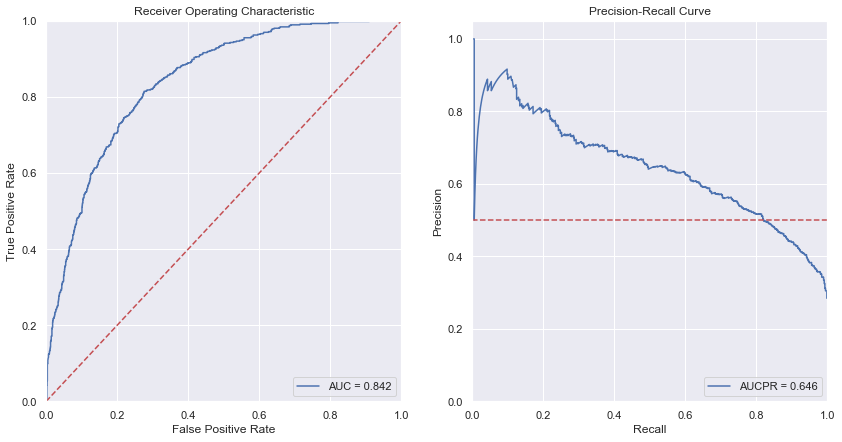

Best iteration: 269 rounds.
AUCROC:    0.842
AUCPR:     0.646
Logloss:   0.488
Precision: 0.516
Recall:    0.815
F1-score:  0.632


In [165]:
from catboost import CatBoostClassifier

# Create training and test set
X = df_cat_encoded.drop(['Churn_Yes', 'gender_Male'], axis=1)
y = df_cat_encoded.Churn_Yes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
cat_features = list(range(3, X.shape[1]))

# Set parameters
params_cat = {
    'random_state': 42,
    'loss_function': 'Logloss',     
    'custom_metric': ['Precision', 'Recall', 'AUC'], 
    'eval_metric': 'F1',
    'scale_pos_weight': 2.76,
    'cat_features': cat_features,
    'iterations': 3000,        
    'use_best_model': True,
    'od_type': 'Iter',
    'od_wait': 20,
    'verbose': 0,
    'max_depth': 8,
    'reg_lambda': 3,
    'learning_rate': 0.03
}

# Instantiate classifier
clf_cat = CatBoostClassifier(**params_cat)

# Fit classifier
clf_cat.fit(
    X_train,
    y_train,
    cat_features=cat_features,
    eval_set=[(X_test, y_test)],
    early_stopping_rounds=100,   
    use_best_model=True,
    verbose=0,
    plot=True                      
);

# Output evaluation metrics 
cat_evals_dict = OrderedDict()
plot_roc_pr(clf_cat)
cat_metrics(clf_cat, cat_evals_dict)

In [ ]:
def plt_mtrs(df):
    sum_tn = df[:1].values.sum()
    sum_tp = df[1:2].values.sum()
    sum_fp = df[2:3].values.sum()
    sum_fn = df[3:4].values.sum()
    precision = sum_tp / (sum_tp + sum_fp)
    recall = sum_tp / (sum_tp + sum_fn)
    f1 = 2 * (precision * recall) / (precision + recall)
       
    df_mtrs = pd.DataFrame(
        data=[precision, recall, f1],
        index=['Precision', 'Recall', 'F1-score'],
        columns=['Value'])
    return df_mtrs

In [166]:
import panel as pn
from panel.interact import interact
pn.extension()

def piechart(df):
    sum_correctpreds = df[:2].values.sum()
    sum_wrongpreds = df[2:4].values.sum()
    correct_perc = sum_correctpreds / (sum_correctpreds + sum_wrongpreds)
    wrong_perc = sum_wrongpreds / (sum_correctpreds + sum_wrongpreds)
    
    # Create colors
    a, b = [plt.cm.Greens, plt.cm.Reds]

    # First Ring (outside)
    fig, ax = plt.subplots(figsize=(7, 7))
    ax.axis('equal')
    group_names=['Correct \npredictions\n{}\n{:.0%}'.format(sum_correctpreds, correct_perc),
                 'Incorrect \npredictions\n{}\n{:.0%}'.format(sum_wrongpreds, wrong_perc)]
    group_size=[sum_correctpreds, sum_wrongpreds]
    mypie, _ = ax.pie(
        group_size,
        radius=1.3,
        labels=group_names,
        colors=[a(0.6), b(0.6)])
    plt.setp(mypie, width=0.3, edgecolor='white')

    # Second Ring (inside)
    sum_tn = df[:1].values.sum()
    sum_tp = df[1:2].values.sum()
    sum_fp = df[2:3].values.sum()
    sum_fn = df[3:4].values.sum()
    sum_all = sum_tn + sum_tp + sum_fp + sum_fn

    tn_perc = sum_tn / sum_all
    tp_perc = sum_tp / sum_all
    fp_perc = sum_fp / sum_all
    fn_perc = sum_fn / sum_all

    subgroup_names = ['TN\n{}\n{:.0%}'.format(sum_tn, tn_perc),
                      'TP\n{}\n{:.0%}'.format(sum_tp, tp_perc),
                      'FP\n{}\n{:.0%}'.format(sum_fp, fp_perc),
                      'FN\n{}\n{:.0%}'.format(sum_fn, fn_perc)]
    subgroup_size=[sum_tn, sum_tp, sum_fp, sum_fn]
    mypie2, _ = ax.pie(
        subgroup_size,
        radius=1.3-0.3,
        labels=subgroup_names,
        labeldistance=0.7,
        colors=[a(0.3), a(0.3), b(0.3), b(0.3)]
    )
#     plt.setp(mypie2, width=0.5, edgecolor='white')
    plt.margins(0,0)
    plt.close(fig)
    
    sum_tn = df[:1].values.sum()
    sum_tp = df[1:2].values.sum()
    sum_fp = df[2:3].values.sum()
    sum_fn = df[3:4].values.sum()
    precision = sum_tp / (sum_tp + sum_fp)
    recall = sum_tp / (sum_tp + sum_fn)
    f1 = 2 * (precision * recall) / (precision + recall)
    df_mtrs = pd.DataFrame(
        data=[precision, recall, f1],
        index=['Precision', 'Recall', 'F1-score'],
        columns=['Value'])
    return fig

def thresh(clf_name, threshold):
    preds = (clf_name.predict_proba(X_test)[:, 1] > threshold).astype('int')
    tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
    df = pd.DataFrame(
        data=[tn, tp, fp, fn],
        index=['True negative', 'True positive', 'False positive', 'False negative'],
        columns=['value'])
    return piechart(df)

Column
    [0] Column
        [0] FloatSlider(end=1.0, name='threshold', start=0.0, step=0.01, value=0.5)
    [1] Row
        [0] Matplotlib(Figure, name='interactive00007')
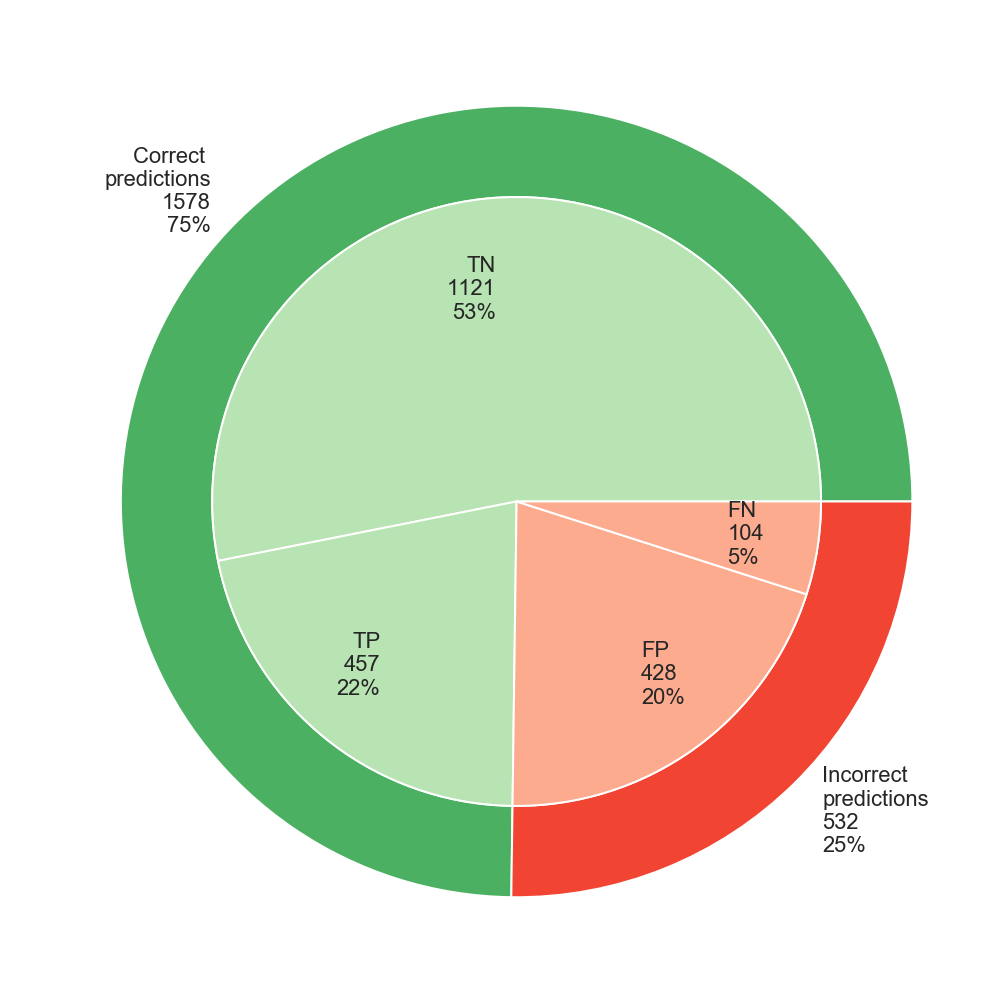

In [167]:
interact(thresh, clf_name=clf_cat, threshold=(0.0, 1.0, 0.01))

### 6.5 SVM Model
Click [here](https://github.com/ayn28/churn-prediction-modeling/blob/master/model-tuning/SVM-tuning.ipynb) to view the tuning process.

In [ ]:
# Define function to calculate evaluation metrics.
def metrics(clf_name, ordered_dict):
    """Calculate and output evaluation metrics."""
    pred_probs = clf_name.predict_proba(X_test)[:, 1]
    ypred = clf_name.predict(X_test)
    # The positive label for the numerically encoded samples == 1
    # The positive label for the samples NOT encoded == 'Yes'
    auc_mtr = roc_auc_score(y_test, pred_probs)
    aucpr_mtr = average_precision_score(y_test, pred_probs, pos_label='Yes')
    logloss_mtr = log_loss(y_test, pred_probs)
    precision_mtr = precision_score(y_test, ypred, pos_label='Yes')
    recall_mtr = recall_score(y_test, ypred, pos_label='Yes')
    f1_mtr = f1_score(y_test, ypred, pos_label='Yes')
    print('AUCROC:    {0:.3f}'.format(auc_mtr))
    print('AUCPR:     {0:.3f}'.format(aucpr_mtr))
    print('Logloss:   {0:.3f}'.format(logloss_mtr))
    print('Precision: {0:.3f}'.format(precision_mtr))
    print('Recall:    {0:.3f}'.format(recall_mtr))
    print('F1-score:  {0:.3f}'.format(f1_mtr))
    # Append metrics to an ordered dictionary (for plotting)
    ordered_dict['AUCROC'] = round(auc_mtr, 3)
    ordered_dict['AUCPR'] = round(aucpr_mtr, 3)
    ordered_dict['Logloss'] = round(logloss_mtr, 3)
    ordered_dict['Precision'] = round(precision_mtr, 3)
    ordered_dict['Recall'] = round(recall_mtr, 3)
    ordered_dict['F1_score'] = round(f1_mtr, 3)
    
# Define function to plot ROC and PR curve.
def plot_roc_pr_svm(clf_name):
    """Plot the ROC and PR-curve for a given classifier."""
    plt.figure(figsize=(14, 7))
    # Plot ROC
    plt.subplot(121)
    probs = clf_name.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, probs, pos_label='Yes')
    roc_auc = auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label='AUC = %0.3f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    # Plot PR curve
    plt.subplot(122)
    precision, recall, thresholds = precision_recall_curve(y_test, probs, pos_label='Yes')
    average_precision = average_precision_score(y_test, probs, pos_label='Yes')
    plt.title('Precision-Recall Curve')
    plt.plot(recall, precision, 'b', label='AUCPR = %0.3f' % average_precision)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0.5, 0.5],'r--')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.show()

In [ ]:
from sklearn.preprocessing import Normalizer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# Final parameters
params_svm = {
    'gamma':      'scale', 
    'probability': True,
    'kernel':     'rbf',
    'C':           1
}

# Create preprocessing pipeline for numerical data
numeric_features = df.select_dtypes(exclude='object').columns.drop(['TotalCharges']).tolist()
numeric_transformer = Pipeline(steps=[
    ('normalize', Normalizer())
    
])

# Create preprocessing pipeline for categorical data
categorical_features = df.select_dtypes(include='object').columns.drop(['Churn', 'gender']).tolist()
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create preprocessing pipeline in a ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Append classifier to preprocessing pipeline
pipe_svm = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', SVC(**params_svm))
])

# Define target and features and exclude TotalCharges from modeling
X = df.drop(['Churn', 'gender', 'TotalCharges'], axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Fit pipeline
pipe_svm.fit(X_train, y_train)

# Output evaluation metrics
svm_evals_dict = OrderedDict()
plot_roc_pr_svm(pipe_svm)
metrics(pipe_svm, svm_evals_dict)

## 7. Model Results and Comparisons

In [ ]:
# Dataframe of final models' evaluation metrics 
df_final = pd.DataFrame(
    data=[
        [val for (metric, val) in xgb_evals_dict.items()],
        [val for (metric, val) in lgbm_evals_dict.items()],
        [val for (metric, val) in cat_evals_dict.items()],
        [val for (metric, val) in svm_evals_dict.items()],
    ],
    columns=[metric for (metric, val) in xgb_evals_dict.items()]
).rename(
    index={
        0: 'XGBoost',
        1: 'LightGBM',
        2: 'CatBoost',
        3: 'SVM'
    })

# Plot metrics
plt.figure(figsize=(11, 10));
N = len(df_final.index)
ind = np.arange(N)
for model in list(df_final.columns):
    plt.plot(ind, df_final[model].values, linewidth=1.5, marker='.', label=model)
plt.axvline(x=2, color='k', linestyle='--')
plt.xticks(
    ticks=np.arange(N),
    labels=['XGBoost', 'LightGBM','CatBoost','SVM'])
plt.title('Model Evaluation Metrics', fontsize=15)
plt.ylabel('Value', fontsize=13)
plt.xlabel('Model', fontsize=13)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.show()

# Number of trees in model
df_final['# of trees'] = [16, 40, 269, '-']

# Number of parameters tuned
df_final['# of parameters tuned'] = [8, 14, 5, 1]

# Runtime for each algorithms' GridSearchCV/RandomizedSearchCV
df_final['Parameter tuning time (min.)'] = [110, 18, 2, 2]
df_final

<div class="alert alert-block alert-success">
The <b>CatBoost</b> model is the best performing model with the strongest predictive power.
</div>

Let's view the amount of records the model misclassified.
* The false positives and false negatives are the misclassified records.
* A **false positive** is a record that's predicted as "churned" that's actually retained.
* A **false negative** is a record that's predicted as "retained" that's actually churned.
* An easy way to remember this concept is to think of a false negative as a "false negative prediction" - the negative class label represents a retained customer whereas the positive class label represents a churned customer.

In [ ]:
from sklearn.metrics import confusion_matrix

# Create training and test set
X = df_cat_encoded.drop(['Churn_Yes', 'gender_Male'], axis=1)
y = df_cat_encoded.Churn_Yes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
cat_ypred = clf_cat.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, cat_ypred).ravel()
print('Confusion matrix for CatBoost:')
print('True negatives: ', tn)
print('True positives:  ', tp)
print('False positives: ', fp)
print('False negatives: ', fn)

* The model yields 75% less false negatives than false positives. The false negatives, or type II errors, are a lot more costly to the company and should be minimized. 
* We'll further evaluate the model's performance in the next section, but for now, let's save the tuned model so we can easily load it up into other python applications/scripts.

In [ ]:
from catboost import Pool

# Define training Pool (required if model contains cat. features)
ptrain = Pool(data=X_train, label=y_train, cat_features=cat_features)

# Save model
clf_cat.save_model(
    fname='catboost-churn-model.model',
    format='python',
    export_parameters=None,
    pool=ptrain
)

## 8. Conclusion

<div class="alert alert-block alert-success">
CatBoost comes out as the most favorable model given its high precision, recall, and f1-score of the four tuned models.
</div>

Given our particular business scenario, optimal precision and recall scores present a unique marketing opportunity to develop successful retention programs. 
Our machine learning model is 

THESE ARE JUST FACTS AND STATING WHAT'S SHOWN ABOVE. EXPLAIN WHAT THESE MEAN FOR OUR BUSINESS.
* The model predicts the most "churners" that are actually churners - as shown by its precision - at the highest total percentage of correctly predicted "churners" - as shown by its recall. 
* Of the gradient boosting algorithms, CatBoost yields the lowest logloss value - which was the loss function we were minimizing - and the highest f1-score - which is the harmonic mean of precision and recall.
* CatBoost also yields high AUCROC and AUCPR values. These values are representative of the model's ability to correctly classify "churners" despite the 3:1 class imbalance.
* It took about 2 minutes to tune the model's parameters, 14 seconds to train the model, and less than a second to make predictions.

Given our particular business scenario, we will closely analyze the recall metric. Recall evaluates the ability of a model to find all the relevant cases within a dataset; it is the number of true positives divided by the sum of true positives and false negatives. In the scope of this project, true positives are correctly identified "churn" customers, and false negatives are individuals the model labels as "retained" who actually "churned".

A false negative is most problematic in our scenario because we misclassify a group of churned customers and miss an opportunity to market towards a niche group in a retention program that is, on average, a fraction of the cost of an acquisition program. By minimizing the number of false negatives, we can maximize our recall value and market towards the largest group of customers predicted to churn.

The main tradeoff here are the additional marketing dollars spent on retained customers that should ideally be spent on customers likely to churn - this, however, isn't entirely undesirable since the marketing dollars allocated towards "retained" customers will add to their longevity with the company.


In [ ]:
# from scipy.optimize import minimize

# def cost_function(params):
#     FN, TN, FP, TP = params
#     return ((costs['fn']*FN)+(costs['tn']*TN)+(costs['fp']*FP)+(costs['tp']*TP))/(FN+TN+FP+TP)

# # initial guess
# x0 = np.array([105, 1089, 460, 456])

# # bounds
# # applicable only to for L-BFGS-B, TNC, SLSQP and trust-constr methods
# bounds = [
#     (0, 561),  # FN
#     (0, 1549), # TN
#     (0, 1549), # FP
#     (0, 561)   # TP
# ]
# minimize(cost_function, x0, method='L-BFGS-B', bounds=bounds)
# minimize(cost_function, x0, method='TNC', bounds=bounds)